In [1]:
%matplotlib inline
import pandas as pd

In [2]:
from IPython.core.display import HTML
css = open('style-table.css').read() + open('style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
titles = pd.DataFrame.from_csv('data/titles.csv', index_col=None)
titles.head()

,title,year
0,God Lives in the Himalayas,2009
1,White Gold,1927
2,Stimulus,2004
3,Hypergraphia,2017
4,Wanted,2011


In [4]:
cast = pd.DataFrame.from_csv('data/cast.csv', index_col=None)
cast.head()

,title,year,name,type,character,n
0,Suuri illusioni,1985,Homo $,actor,Guests,22
1,Gangsta Rap: The Glockumentary,2007,Too $hort,actor,Himself,NaN
2,Menace II Society,1993,Too $hort,actor,Lew-Loc,27
3,Porndogs: The Adventures of Sadie,2009,Too $hort,actor,Bosco,3
4,Stop Pepper Palmer,2014,Too $hort,actor,Himself,NaN


### Using groupby(), plot the number of films that have been released each decade in the history of cinema.

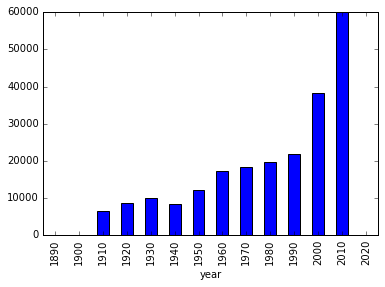

In [10]:
films_by_year = titles.groupby(titles.year // 10 * 10).size()

films_by_year.plot(kind = 'bar')

### Use groupby() to plot the number of "Hamlet" films made each decade.

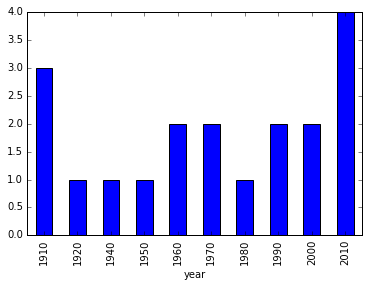

In [12]:
hamlets_by_year = titles[titles.title == 'Hamlet'].groupby(titles.year // 10 * 10).size()
hamlets_by_year.plot(kind = 'bar')

### How many leading (n=1) roles were available to actors, and how many to actresses, in each year of the 1950s?

In [17]:
cast[(cast.n == 1) & (cast.year // 10 == 195)].groupby([cast.year, cast.type]).size()

year  type   
1950  actor      604
      actress    278
1951  actor      639
      actress    274
1952  actor      593
      actress    286
1953  actor      639
      actress    294
1954  actor      636
      actress    301
1955  actor      618
      actress    271
1956  actor      631
      actress    294
1957  actor      716
      actress    292
1958  actor      702
      actress    278
1959  actor      690
      actress    302
dtype: int64

### In the 1950s decade taken as a whole, how many total roles were available to actors, and how many to actresses, for each "n" number 1 through 5?

In [23]:
cast[(cast.year // 10 == 195) & (cast.n < 6)].groupby([cast.n, cast.type]).size()

n  type   
1  actor      6468
   actress    2870
2  actor      4446
   actress    4465
3  actor      5482
   actress    3071
4  actor      5466
   actress    2792
5  actor      5498
   actress    2483
dtype: int64

### Use groupby() to determine how many roles are listed for each of the Pink Panther movies.

In [38]:
cast[(cast.title == 'The Pink Panther') & (cast.n.notnull())].groupby(cast.year).size()

year
1963    15
2006    51
dtype: int64

### List, in order by year, each of the films in which Frank Oz has played more than 1 role.

In [6]:
frank_roles = cast[cast.name == 'Frank Oz'].groupby([cast.year, cast.title]).size()
frank_roles[frank_roles > 1]

year  title                               
1979  The Muppet Movie                        8
1981  An American Werewolf in London          2
      The Great Muppet Caper                  6
1982  The Dark Crystal                        2
1984  The Muppets Take Manhattan              7
1985  Follow That Bird                        3
1992  The Muppet Christmas Carol              7
1996  Muppet Treasure Island                  4
1999  Muppets from Space                      4
      The Adventures of Elmo in Grouchland    3
dtype: int64

### List each of the characters that Frank Oz has portrayed at least twice.

In [9]:
frank_oz_chars = cast[cast.name == "Frank Oz"].groupby([cast.character]).size()

frank_oz_chars[frank_oz_chars > 1]

character
Animal            6
Bert              3
Cookie Monster    3
Fozzie Bear       4
Grover            2
Miss Piggy        6
Sam the Eagle     5
Yoda              6
dtype: int64